In [6]:
import numpy as np
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from transformers_interpret import ImageClassificationExplainer
from PIL import Image

In [2]:
model_name = "e1010101/vit-384-tongue-image-segmented-augmented"
model = AutoModelForImageClassification.from_pretrained(model_name)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [7]:
image = Image.open("../Samples/segmented/segmented_sample_1.png")
image_array = np.array(image)

image_classification_explainer = ImageClassificationExplainer(model=model, feature_extractor=feature_extractor)

image_attributions = image_classification_explainer(image_array)

print(image_attributions.shape)

(1, 3, 384, 384)


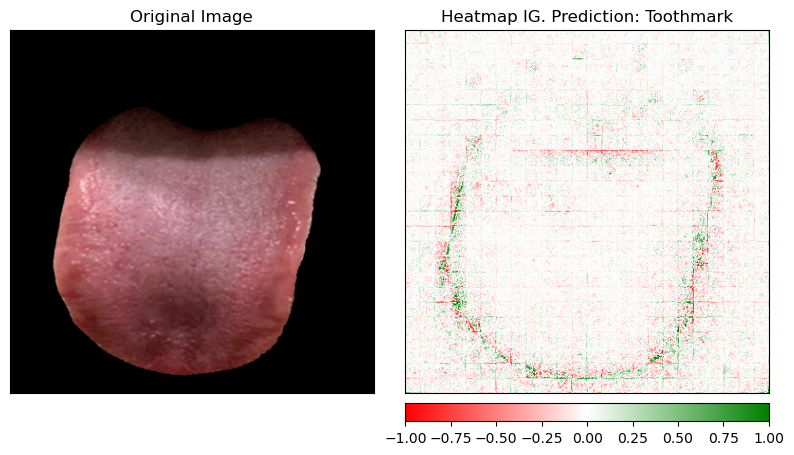

(<Figure size 800x600 with 4 Axes>,
 array([<Axes: title={'center': 'Original Image'}>,
        <Axes: title={'center': 'Heatmap IG. Prediction: Toothmark'}>],
       dtype=object))

In [8]:
image_classification_explainer.visualize(
    method="heatmap",
    side_by_side=True,
    outlier_threshold=0.03
)